Wilshire Liu and Joseph Chin

# Business Data Science  4

In [14]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Problem 2

In [3]:
# generate some sparse data to play with
np.random.seed(7)

n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

k = 5
# beta generated with k nonzeros
#coef = 10 * np.random.randn(n_features)
coef = 10 * np.ones(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[k:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:25], y[:25]
X_test, y_test = X[25:], y[25:]

In [4]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [6]:
lasso = Lasso(alpha=.5)
features = list(range(0,200))
r2_dict = {}
features_list = []

for i in range(n_features):
    inner_r2 = {}
    
    for j in features:
        y_pred = lasso.fit(X_train[features_list + [j]], y_train).predict(X_test[features_list + [j]])
        r2_lasso = r2_score(y_test, y_pred)
        inner_r2[j] = r2_lasso
        
    feature_to_add = max(inner_r2, key = inner_r2.get)
    highest_r2 = max(inner_r2.values())
    
    r2_dict[feature_to_add] = highest_r2
    #print(r2_dict)
    features_list.append(feature_to_add)
    print(features_list)
    features.remove(feature_to_add)
    #print(features)
        
        
print(features_list)

[18]
[18, 51]
[18, 51, 78]
[18, 51, 78, 137]
[18, 51, 78, 137, 15]
[18, 51, 78, 137, 15, 34]
[18, 51, 78, 137, 15, 34, 157]
[18, 51, 78, 137, 15, 34, 157, 24]
[18, 51, 78, 137, 15, 34, 157, 24, 0]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70]
[18, 51, 78, 137, 15, 34, 157, 24, 

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 1

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 14

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170, 71, 148, 44, 30, 181, 59, 61, 23, 85, 12, 69, 135, 141, 150, 53]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143,

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170, 71, 148, 44, 30, 181, 59, 61, 23, 85, 12, 69, 135, 141, 150, 53, 127, 77, 198, 7, 60, 52, 19, 111, 79, 145, 122, 134, 8, 117]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170, 71, 148, 44, 30, 181, 59, 61, 23, 85, 12, 69, 135, 141, 150, 53, 127, 77, 198, 7, 60, 52, 19, 111, 79, 145, 122, 134, 8, 117, 40, 199, 164, 87, 106, 132, 165, 177, 151, 121, 155, 75, 37]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188,

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170, 71, 148, 44, 30, 181, 59, 61, 23, 85, 12, 69, 135, 141, 150, 53, 127, 77, 198, 7, 60, 52, 19, 111, 79, 145, 122, 134, 8, 117, 40, 199, 164, 87, 106, 132, 165, 177, 151, 121, 155, 75, 37, 47, 90, 107, 118, 13, 103, 39, 29, 166, 5, 38, 120]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 14

[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110, 112, 116, 119, 123, 124, 130, 138, 140, 142, 146, 147, 152, 153, 154, 158, 161, 167, 169, 180, 188, 189, 190, 192, 194, 195, 66, 191, 2, 4, 36, 76, 82, 84, 91, 105, 160, 162, 176, 184, 193, 1, 186, 133, 175, 33, 139, 143, 55, 64, 68, 48, 26, 187, 67, 11, 57, 168, 196, 45, 126, 144, 182, 72, 128, 43, 131, 9, 16, 156, 159, 27, 125, 28, 97, 113, 42, 49, 93, 74, 129, 6, 136, 25, 35, 102, 115, 149, 170, 71, 148, 44, 30, 181, 59, 61, 23, 85, 12, 69, 135, 141, 150, 53, 127, 77, 198, 7, 60, 52, 19, 111, 79, 145, 122, 134, 8, 117, 40, 199, 164, 87, 106, 132, 165, 177, 151, 121, 155, 75, 37, 47, 90, 107, 118, 13, 103, 39, 29, 166, 5, 38, 120, 185, 171, 183, 3, 54, 163, 65, 62, 172, 81, 20]
[18, 51, 78, 137, 15, 34, 157, 24, 0, 10, 14, 17, 21, 22, 31, 32, 41, 46, 58, 63, 70, 73, 83, 86, 88, 89, 92, 94, 95, 98, 99, 100, 101, 104, 108, 109, 110,

In [7]:
keys = []
for k in r2_dict.keys():
    keys.append(str(k))

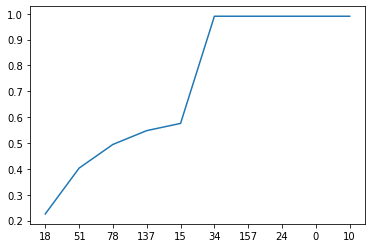

In [11]:
values = list(r2_dict.values())

plt.plot(keys[:10], values[:10])


In [12]:
lasso = Lasso(alpha = 3)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("R^2 on test data : %f" % r2_score_lasso)

R^2 on test data : 0.450593


In [15]:
parameters = {'alpha':range(1,10)}
grid = GridSearchCV(Lasso(), param_grid=parameters, cv=3, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
#print(grid.cv_results_)

{'alpha': 9}
0.12893162998471036


In [16]:
cv_list = {}
for c in range(2,26):
    parameters = {'alpha':range(1,10)}
    grid = GridSearchCV(Lasso(), param_grid=parameters, cv=c, scoring='r2')
    grid.fit(X_train, y_train)
    cv_list[c] = grid.best_params_

print(cv_list)

{2: {'alpha': 6}, 3: {'alpha': 9}, 4: {'alpha': 9}, 5: {'alpha': 5}, 6: {'alpha': 2}, 7: {'alpha': 1}, 8: {'alpha': 1}, 9: {'alpha': 2}, 10: {'alpha': 2}, 11: {'alpha': 2}, 12: {'alpha': 2}, 13: {'alpha': 1}, 14: {'alpha': 1}, 15: {'alpha': 1}, 16: {'alpha': 1}, 17: {'alpha': 1}, 18: {'alpha': 1}, 19: {'alpha': 1}, 20: {'alpha': 1}, 21: {'alpha': 2}, 22: {'alpha': 1}, 23: {'alpha': 1}, 24: {'alpha': 1}, 25: {'alpha': 1}}


As number of folds increases, alpha also increases for a little bit, but starting from 5 folds, alpha decreases and then steadily reduces to 1, probably because it becomes LOOCV eventually.

In [17]:
lassocv = LassoCV(alphas = range(1,10), cv=3).fit(X_train, y_train)
lassocv.alpha_

9

They do agree. The best alpha found with GridSearchCV matches with the best alpha found with LassoCV. LassoCV loops through a list of alphas you give it while puts each model through a CV of how many folds you give it. This is the same what GridSearchCV does... but you have to make sure that the number of folds is the same in the LassoCV model and the GridSearchCV because there could be a different alpha based on how many folds you use.

# Problem 5

In [19]:
arsenic = pd.read_csv('wells.dat', delimiter=" ")
arsenic.head(10)

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14
6,1,3.90,69.517998,1,9
7,1,2.97,80.710999,1,4
8,1,3.24,55.146000,0,10
9,1,3.28,52.646999,1,0
10,1,2.52,75.071999,1,0


In [20]:
dist = pd.DataFrame(arsenic['dist'])
switch = arsenic['switch']

In [37]:
lr = LogisticRegression(fit_intercept=True)

lr.fit(dist, switch)
y_pred = lr.predict(dist)

In [38]:
print('Misclassified samples in set: %d' %(switch != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(switch, y_pred))

Misclassified samples in set: 1224
Accuracy: 0.59


In [39]:
y_probas = lr.predict_proba(dist)
y_probas = y_probas[:,1]

Text(0, 0.5, 'probability of switching wells')

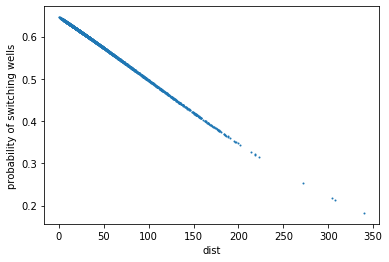

In [43]:
plt.scatter(dist, y_probas, s=1)
plt.xlabel('dist')
plt.ylabel('probability of switching wells')

In [44]:
#print(lr.coef_[0][0])
#print(lr.intercept_)
print('For every 100 meters of distance, the chances of switching wells changes by approximately: \n' + str((lr.coef_[0][0]/4) * 100) + ' or by ' + str((lr.coef_[0][0]/4) * 10000) + '%')

For every 100 meters of distance, the chances of switching wells changes by approximately: 
-0.15477091831357734 or by -15.477091831357734%


In [45]:
arsenic_dist = pd.DataFrame(arsenic[['arsenic', 'dist']])

lr.fit(arsenic_dist, switch)
y_pred = lr.predict(arsenic_dist)

In [46]:
print('Misclassified samples in set: %d' %(switch != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(switch, y_pred))

Misclassified samples in set: 1154
Accuracy: 0.62


In [47]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.45999479 -0.00896108]]
[0.00367627]


In [48]:
scaler = StandardScaler()
arsenic_dist_sd = scaler.fit_transform(arsenic_dist)
arsenic_dist_sd = pd.DataFrame(arsenic_dist_sd, columns = arsenic_dist.columns.values)
arsenic_dist_sd.head(10)

,arsenic,dist
0,0.634996,-0.818923
1,-0.855245,-0.026249
2,0.373075,-0.711287
3,-0.457848,-0.697797
4,-0.503006,-0.193850
5,2.025887,0.550685
6,1.185933,0.841622
7,1.429791,0.177118
8,1.465918,0.112162
9,0.779504,0.695049


In [49]:
lr.fit(arsenic_dist_sd, switch)
print(lr.coef_)

[[ 0.50885618 -0.34414021]]


After normalizing the arsenic and distance values, arsenic still has a larger beta value, thus indicating that for every 1 unit increase in arsenic, there is a larger change in probability than if there is a 1 unit increase in distance. These coefficients also make sense because the higher the arsenic levels, it's more likely that a family will switch wells; also, the farther the next closest well is, the less likely a family is going to switch wells (as indicated by the negative probability).

In [80]:
all_features = arsenic.drop('switch', axis=1)

lr = LogisticRegression(fit_intercept=True)
scores = cross_val_score(lr, all_features, switch, cv=5)
scores

array([0.63140496, 0.59504132, 0.58112583, 0.65505804, 0.56053068])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(all_features, switch, test_size=0.3, random_state=0)

lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Misclassified samples in set: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples in set: 339
Accuracy: 0.63


In [97]:
all_features_interaction = all_features.copy()
all_features_interaction['interaction'] = all_features_interaction['educ'] * all_features_interaction['assoc']

lr = LogisticRegression(fit_intercept=True)
scores = cross_val_score(lr, all_features_interaction, switch, cv=5)
scores

array([0.62644628, 0.59008264, 0.57615894, 0.65505804, 0.55223881])

In [100]:
all_features.corr()

,arsenic,dist,assoc,educ
arsenic,1.000000,0.178058,-0.024912,-0.029563
dist,0.178058,1.000000,-0.003460,-0.026741
assoc,-0.024912,-0.003460,1.000000,-0.031367
educ,-0.029563,-0.026741,-0.031367,1.000000


We decided that none of the features have an interaction between each other because we tried adding an interaction term between each pair, and the accuracy still stayed around .6.